<a href="https://colab.research.google.com/github/pitimonb/coal_analysis/blob/new-ds/coal_analysis_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Enviroment

In [517]:
from __future__ import absolute_import, division, print_function
import os
import numpy as np
import pathlib
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import time
from tensorflow import keras
from tensorflow.keras import layers

# Setup State
y = yes
n = no

In [518]:
train_state = 'y'
early_stop_state = 'y'
save_state = 'y'
load_state = 'n'
model_num = 6
coal_prop = ['AR_Carbon','AR_Nitrogen','AR_Hydrogen_Inc','AR_Oxygen_Inc','AR_Hydrogen_Exc','AR_Oxygen_Exc',]

In [519]:
if save_state == 'y':
  !pip install tensorflowjs

# Import Dataset using pandas

In [520]:
car_dataset_url = "https://raw.githubusercontent.com/pitimonb/coal_analysis/new-ds/dataset/coal_car_ds.csv"
nit_dataset_url = "https://raw.githubusercontent.com/pitimonb/coal_analysis/new-ds/dataset/coal_nit_ds.csv"
hyd_inc_dataset_url = "https://raw.githubusercontent.com/pitimonb/coal_analysis/new-ds/dataset/coal_hyd_inc_ds.csv"
oxy_inc_dataset_url = "https://raw.githubusercontent.com/pitimonb/coal_analysis/new-ds/dataset/coal_oxy_inc_ds.csv"
hyd_exc_dataset_url = "https://raw.githubusercontent.com/pitimonb/coal_analysis/new-ds/dataset/coal_hyd_exc_ds.csv"
oxy_exc_dataset_url = "https://raw.githubusercontent.com/pitimonb/coal_analysis/new-ds/dataset/coal_oxy_exc_ds.csv"

car_dataset = pd.read_csv(car_dataset_url)
nit_dataset = pd.read_csv(nit_dataset_url)
hyd_inc_dataset = pd.read_csv(hyd_inc_dataset_url)
oxy_inc_dataset = pd.read_csv(oxy_inc_dataset_url)
hyd_exc_dataset = pd.read_csv(hyd_exc_dataset_url)
oxy_exc_dataset = pd.read_csv(oxy_exc_dataset_url)

#print(car_dataset)
#print(nit_dataset)
#print(hyd_inc_dataset)
#print(oxy_inc_dataset)
#print(hyd_exc_dataset)
#print(oxy_exc_dataset)

In [521]:
dataset = [car_dataset,nit_dataset,hyd_inc_dataset,oxy_inc_dataset,hyd_exc_dataset,oxy_exc_dataset]

# Clean data

In [522]:
car_dataset.isna().sum()

p_ar_mois    0
p_ar_vol     0
p_ar_ash     0
p_ar_fc      0
p_ar_sul     0
p_ar_hhv     0
p_ar_lhv     0
u_ar_car     0
dtype: int64

In [523]:
nit_dataset.isna().sum()

p_ar_mois    0
p_ar_vol     0
p_ar_ash     0
p_ar_fc      0
p_ar_sul     0
p_ar_hhv     0
p_ar_lhv     0
u_ar_nit     0
dtype: int64

In [524]:
hyd_inc_dataset.isna().sum()

p_ar_mois       0
p_ar_vol        0
p_ar_ash        0
p_ar_fc         0
p_ar_sul        0
p_ar_hhv        0
p_ar_lhv        0
u_ar_hyd_inc    0
dtype: int64

In [525]:
oxy_inc_dataset.isna().sum()

p_ar_mois       0
p_ar_vol        0
p_ar_ash        0
p_ar_fc         0
p_ar_sul        0
p_ar_hhv        0
p_ar_lhv        0
u_ar_oxy_inc    0
dtype: int64

In [526]:
hyd_exc_dataset.isna().sum()

p_ar_mois       0
p_ar_vol        0
p_ar_ash        0
p_ar_fc         0
p_ar_sul        0
p_ar_hhv        0
p_ar_lhv        0
u_ar_hyd_exc    0
dtype: int64

In [527]:
oxy_exc_dataset.isna().sum()

p_ar_mois       0
p_ar_vol        0
p_ar_ash        0
p_ar_fc         0
p_ar_sul        0
p_ar_hhv        0
p_ar_lhv        0
u_ar_oxy_exc    0
dtype: int64

# Input Data

In [528]:
input_dataset_url = "https://raw.githubusercontent.com/pitimonb/coal_analysis/new-ds/dataset/coal_ds.csv"
input_data = {'p_ar_mois':[31.94],'p_ar_vol':[24.98],'p_ar_ash':[26.55],'p_ar_fc':[16.53],'p_ar_sul':[2.575],'p_ar_hhv':[2685.737],'p_ar_lhv':[2390.733]}
input_dataset = pd.read_csv(input_dataset_url)
input_data = pd.DataFrame(data = input_data)
#print(input_dataset)
#print(input_data)

# Split data into Train and Test

In [529]:
ds_frac = 0.8
def train_ds(x):
  return (x.sample(frac = ds_frac,random_state = 0))
def test_ds (x):
  return x.drop((x.sample(frac = ds_frac,random_state = 0)).index)

In [530]:
train_dataset = [1,2,3,4,5,6]
test_dataset = [1,2,3,4,5,6]
for i in range(model_num):
  train_dataset[i] = train_ds(dataset[i])
#test_dataset = [1,2,3,4,5,6]
for i in range (model_num):
  test_dataset[i] = test_ds(dataset[i])

#print(train_dataset[0])
#print(train_dataset[1])
#print(train_dataset[2])
#print(train_dataset[3])
#print(train_dataset[4])
#print(train_dataset[5])

# Inspect Data

In [531]:
#sns.pairplot(train_dataset[0][["p_mois","p_vol","p_ash","p_car","p_sul","u_car"]], diag_kind="kde")# Use
#sns.pairplot(train_dataset[1][["p_mois","p_vol","p_ash","p_car","p_sul","u_hyd"]], diag_kind="kde")# Use
#sns.pairplot(train_dataset[2][["p_mois","p_vol","p_ash","p_car","p_sul","u_nit"]], diag_kind="kde")# Use

# Overall Stat

In [532]:
train_stats = [1,2,3,4,5,6]
train_pop = ["u_ar_car","u_ar_nit","u_ar_hyd_inc","u_ar_oxy_inc","u_ar_hyd_exc","u_ar_oxy_exc"]
for i in range(model_num):
  train_stats[i] = train_dataset[i].describe()
  train_stats[i].pop(str(train_pop[i]))
  train_stats[i] = train_stats[i].transpose()
train_stats[1]

,count,mean,std,min,25%,50%,75%,max
p_ar_mois,2332.0,29.854001,1.755956,25.060,28.66750,29.750,30.93000,35.861
p_ar_vol,2332.0,27.549441,1.439363,22.420,26.54000,27.625,28.64000,31.937
p_ar_ash,2332.0,25.216928,3.992142,14.179,22.79000,25.775,28.23000,35.550
p_ar_fc,2332.0,17.379639,2.359325,11.740,15.71500,17.100,18.87000,25.280
p_ar_sul,2332.0,2.743728,0.395033,1.529,2.48600,2.754,2.97625,4.456
p_ar_hhv,2332.0,2956.993276,253.427627,2303.002,2770.57675,2933.337,3128.16275,3758.618
p_ar_lhv,2332.0,2668.084480,251.887351,2021.207,2481.81050,2643.312,2838.26250,3472.859


# Split feature form label
Separate the target value (label) form feature. Label = value that train model to predict.

In [533]:
train_label = [1,2,3,4,5,6]
test_label = [1,2,3,4,5,6]
for i in range(model_num):
  train_label[i] = train_dataset[i].pop(str(train_pop[i]))
  test_label[i] = test_dataset[i].pop(str(train_pop[i]))

#print(train_label[1])
#print(test_label[1])

# Normalize Data

In [534]:
normed_train_data = [1,2,3,4,5,6]
normed_test_data = [1,2,3,4,5,6]
normed_input_data = [1,2,3,4,5,6]
normed_input_dataset = [1,2,3,4,5,6]
for i in range(model_num):
  normed_train_data[i] = (train_dataset[i] - train_stats[i]['mean']) / train_stats[i]['std']
  normed_test_data[i] = (test_dataset[i] - train_stats[i]['mean']) / train_stats[i]['std']
  normed_input_data[i] = (input_data - train_stats[i]['mean']) / train_stats[i]['std']
  normed_input_dataset[i] = (input_dataset - train_stats[i]['mean']) / train_stats[i]['std']

#print(normed_train_data[1])
#print(normed_test_data[1])
#print(normed_input_data[1])
#print(normed_input_dataset[1])

# The Model

In [535]:
def build_model_1(x):
  model = keras.Sequential([
    layers.Dense(512,activation = tf.nn.relu, input_shape = [len(x.keys())]),
    layers.Dense(256,activation = tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile (loss = 'mse',
                 optimizer = optimizer,
                 metrics = ['mae', 'mse'])
  return model

In [536]:
def build_model_2(x):
  model = keras.Sequential([
    layers.Dense(1024,activation = tf.nn.relu, input_shape = [len(x.keys())]),
    layers.Dense(512,activation = tf.nn.relu),
    layers.Dense(256,activation = tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile (loss = 'mse',
                 optimizer = optimizer,
                 metrics = ['mae', 'mse'])
  return model

In [537]:
def build_model_3(x):
  model = keras.Sequential([
    layers.Dense(64,activation = tf.nn.relu, input_shape = [len(x.keys())]),
    layers.Dense(32,activation = tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile (loss = 'mse',
                 optimizer = optimizer,
                 metrics = ['mae', 'mse'])
  return model

In [538]:
model_pre = [1,2,3,4,5,6]
for i in range(model_num):
  model_pre[i] = build_model_3(train_dataset[i])

#Train Model
Train model for 1000 epochs, and recoed the training and validation accuracy in the history object.

In [539]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end = '')
  
EPOCHS = 1500

In [540]:
history = [1,2,3,4,5,6]
if train_state == 'y':
  if early_stop_state == 'y':
    for i in range(model_num):
      early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
      history[i] = model_pre[i].fit(
      normed_train_data[i], train_label[i],
      epochs = EPOCHS, validation_split = 0.2, verbose = 0,
      callbacks = [early_stop, PrintDot()])
      print(' Finish train model: ' + str(coal_prop[i]))
  else:
    for i in range(model_num):
      history[i] = model_pre[i].fit(
      normed_train_data[i], train_label[i],
      epochs = EPOCHS, validation_split = 0.2, verbose = 0,
      callbacks = [PrintDot()])
      print(' Finish train model: ' + str(coal_prop[i]))
else:
  print('Not train')


....................................................................................................
........................................................... Finish train model: AR_Carbon

............................................................................. Finish train model: AR_Nitrogen

....................................................................................................
....................................................................................................
......... Finish train model: AR_Hydrogen_Inc

....................................................................................................
......................... Finish train model: AR_Oxygen_Inc

....................................................................................................
................ Finish train model: AR_Hydrogen_Exc

....................................................................................................
...................... Finish

Visualize the model's training progress using the stat stored in the History object.

In [541]:
def plot_history(history):

  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.xlabel('Mean Abs Error [Output]')
  plt.plot(hist['epoch'], hist['mae'],
           label = 'Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.legend()
  plt.title(coal_prop[i])

  plt.figure()
  plt.xlabel('Epoch')
  plt.xlabel('Mean Square Error [$Output^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label = 'Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.legend()
  plt.title(coal_prop[i])

************************************************************************************
AR_Carbon
         loss       mae       mse  val_loss   val_mae   val_mse  epoch
154  0.308137  0.390622  0.308137  0.254206  0.329807  0.254206    154
155  0.292218  0.378539  0.292218  0.312315  0.401414  0.312315    155
156  0.293992  0.382188  0.293992  0.480308  0.536612  0.480308    156
157  0.299743  0.387685  0.299743  0.423620  0.508609  0.423620    157
158  0.291285  0.381388  0.291285  0.239762  0.330508  0.239762    158
************************************************************************************
AR_Nitrogen
        loss       mae       mse  val_loss   val_mae   val_mse  epoch
72  0.005594  0.055589  0.005594  0.005966  0.057986  0.005966     72
73  0.005584  0.054853  0.005584  0.011517  0.084002  0.011517     73
74  0.005518  0.055240  0.005518  0.011678  0.085021  0.011678     74
75  0.005564  0.055159  0.005564  0.006879  0.062185  0.006879     75
76  0.005470  0.054694  0.005470

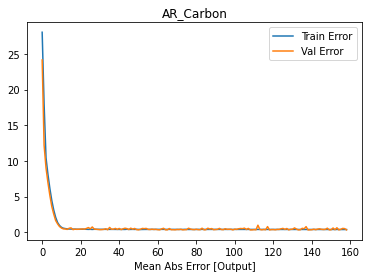

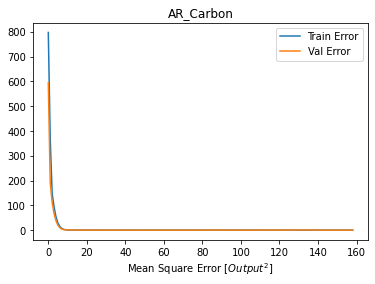

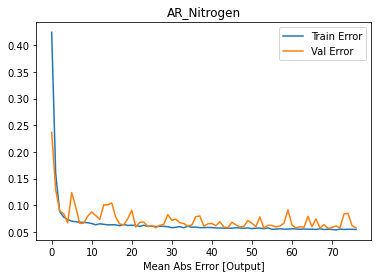

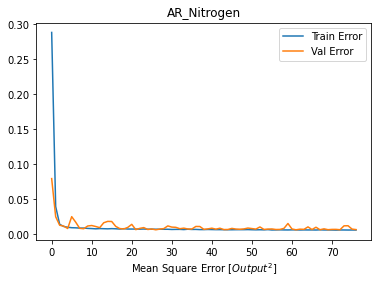

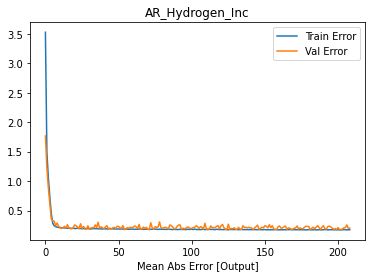

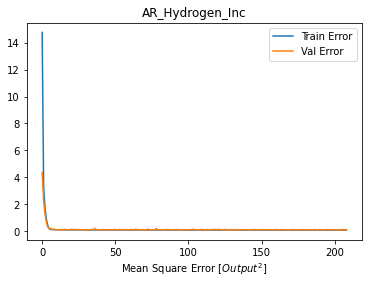

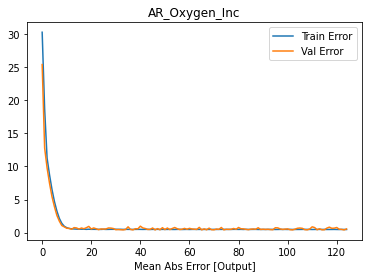

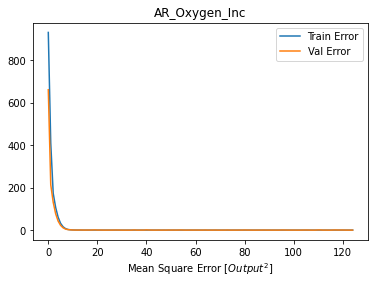

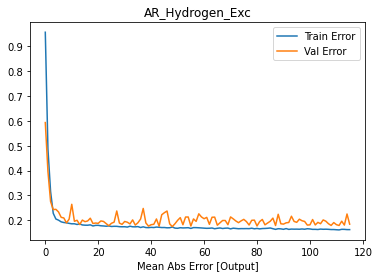

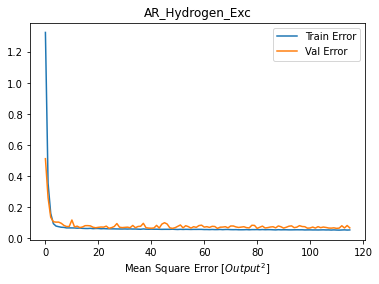

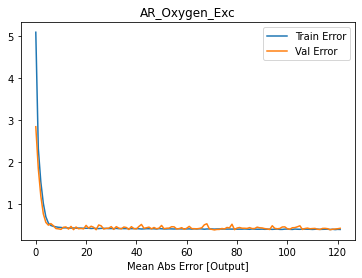

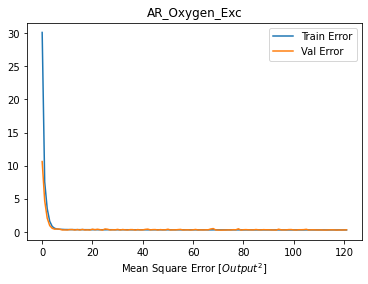

In [542]:
hist = [1,2,3,4,5,6]
if train_state == 'y':
  for i in range(model_num):
    hist[i] = pd.DataFrame(history[i].history)
    hist[i]['epoch'] = history[i].epoch
    print('************************************************************************************')
    print(coal_prop[i])
    print(hist[i].tail())
    #plot_history(history[i],coal_prop[i])
    plot_history(history[i])
else:
  print()

In [543]:
rmse_val = [1,2,3,4,5,6]
for i in range(model_num):
  loss_val, mae_val, mse_val = model_pre[i].evaluate(normed_test_data[i], test_label[i], verbose = 0)
  rmse_val[i] = math.sqrt(mse_val)
  print(coal_prop[i])
  print("Testing set Mean Abs Error: {:5.2f}".format(mae_val))
  print("Testing set RMSE: {:5.2f}".format(math.sqrt(mse_val)))
  print('**********************************************************')


AR_Carbon
Testing set Mean Abs Error:  0.32
Testing set RMSE:  0.50
**********************************************************
AR_Nitrogen
Testing set Mean Abs Error:  0.06
Testing set RMSE:  0.08
**********************************************************
AR_Hydrogen_Inc
Testing set Mean Abs Error:  0.19
Testing set RMSE:  0.25
**********************************************************
AR_Oxygen_Inc
Testing set Mean Abs Error:  0.58
Testing set RMSE:  0.79
**********************************************************
AR_Hydrogen_Exc
Testing set Mean Abs Error:  0.18
Testing set RMSE:  0.25
**********************************************************
AR_Oxygen_Exc
Testing set Mean Abs Error:  0.45
Testing set RMSE:  0.62
**********************************************************


# Make Prediction
Predict Output value using data in testing set

In [544]:
test_pred = [1,2,3,4,5,6]
for i in range(model_num):
  test_pred[i] = model_pre[i].predict(normed_test_data[i]).flatten()

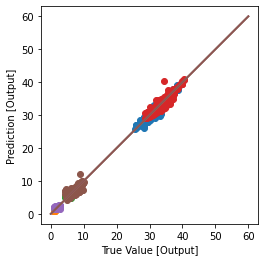

In [545]:
for i in range(model_num):
  plt.scatter(test_label[i], test_pred[i])
  #plt.title(coal_prop[i])
  plt.xlabel('True Value [Output]')
  plt.ylabel('Prediction [Output]')
  plt.axis('equal')
  plt.axis('square')
  _ = plt.plot([0,60], [0,60])

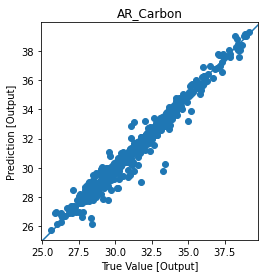

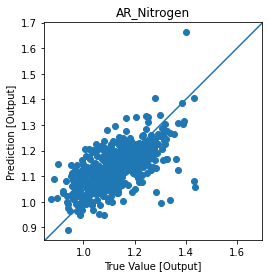

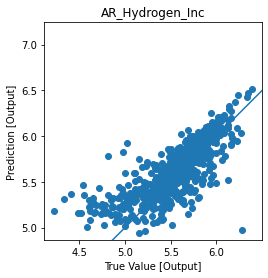

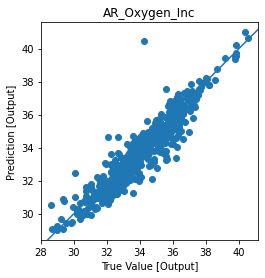

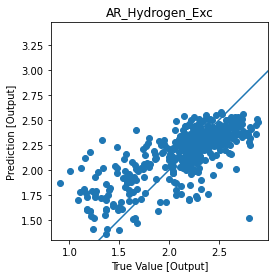

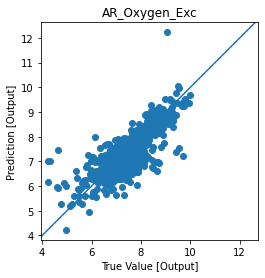

In [546]:
for i in range(model_num):
  plt.scatter(test_label[i], test_pred[i])
  plt.title(coal_prop[i])
  plt.xlabel('True Value [Output]')
  plt.ylabel('Prediction [Output]')
  plt.axis('equal')
  plt.axis('square')
  _ = plt.plot([0,100], [0,100])
  plt.show()

# Save Model

In [547]:
model_save_name = ['ar_car.h5','ar_nit_model.h5','ar_hyd_inc_model.h5','ar_oxy_inc_model.h5','ar_hyd_exc_model.h5','ar_oxy_exc_model.h5']
if save_state == 'y':
  for i in range(model_num):
    model_pre[i].save(model_save_name[i])
    !tensorflowjs_converter --input_format=keras /content/ar_car.h5 /content/js/car
    !tensorflowjs_converter --input_format=keras /content/ar_nit_model.h5 /content/js/nit
    !tensorflowjs_converter --input_format=keras /content/ar_hyd_inc_model.h5 /content/js/hyd_inc
    !tensorflowjs_converter --input_format=keras /content/ar_oxy_inc_model.h5 /content/js/oxy_inc
    !tensorflowjs_converter --input_format=keras /content/ar_hyd_exc_model.h5 /content/js/hyd_exc
    !tensorflowjs_converter --input_format=keras /content/ar_oxy_exc_model.h5 /content/js/oxy_exc
  print("Model Saved")
else:
  print("Not save model") 

model_prod = [1,2,3,4,5,6]
if load_state =='y':
  for i in range(model_num):
    model_prod[i] = keras.models.load_model(model_save_name[i])
  print("Model Load")
else:
  print("Not load model Prod")

2021-02-22 09:10:45.743793: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-02-22 09:10:48.562723: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-02-22 09:10:51.405830: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-02-22 09:10:54.136093: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-02-22 09:10:56.977845: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-02-22 09:10:59.711419: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-02-22 09:11:02.570047: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic libr

In [548]:
rmse_val_prod = [1,2,3,4,5,6]
if load_state =='y':
  for i in range(model_num):
    loss_val_prod, mae_val_prod, mse_val_prod = model_prod[i].evaluate(normed_test_data[i], test_label[i], verbose = 0)
    rmse_val_prod[i] = math.sqrt(mse_val_prod)
    print(coal_prop[i])
    print("Testing set Mean Abs Error: {:5.2f}".format(mae_val_prod))
    print("Testing set RMSE: {:5.2f}".format(math.sqrt(mse_val_prod)))
    print('**********************************************************')
else:
  print("Not load model Prod")

Not load model Prod


# Data Input Result

In [549]:
#print(normed_input_data[0])

In [550]:
#input_data_pred = model_pre[0].predict(normed_input_data[0])
#input_data_pred

In [551]:
input_data_pred = [1,2,3,4,5,6]
input_dataset_pred = [1,2,3,4,5,6]
output = ['ar_car.csv","ar_nit.csv','ar_hyd_inc.csv','ar_oxy_inc.csv','ar_hyd_exc.csv','ar_oxy_exc.csv']
print('Pre-production Model:')
for i in range(model_num):
  input_data_pred[i] = model_pre[i].predict(normed_input_data[i]).flatten()
  input_data_pred[i] = float(input_data_pred[i])
  print(str(coal_prop[i]) + ": {:5.3f}".format(input_data_pred[i]) + "  ,RMSE: {:5.3f}".format(rmse_val[i]))
print('***************************************************************************************')
print('Prodution Model:')
if load_state =='y':
  for i in range(model_num):
    input_data_pred[i] = model_prod[i].predict(normed_input_data[i]).flatten()
    input_data_pred[i] = float(input_data_pred[i])
    print(str(coal_prop[i]) + ": {:5.3f}".format(input_data_pred[i]) + "  ,RMSE: {:5.3f}".format(rmse_val_prod[i]))
else:
  print("Not load model Prod")

if load_state =='y':
  for i in range(model_num):
    input_dataset_pred[i] = model_prod[i].predict(normed_input_dataset[i])#.flatten()
    np.savetxt(output[i], input_dataset_pred[i], delimiter=",")
    #np.savetxt("score1.csv", input_dataset_pred[1], delimiter=",")
    #np.savetxt("score2.csv", input_dataset_pred[2], delimiter=",")
    print(input_dataset_pred[0])
    print(input_dataset_pred[1])
    print(input_dataset_pred[2])
    #input_dataset_pred[i] = float(input_dataset_pred[i])
    #print(str(coal_prop[i]) + ": {:5.3f}".format(input_dataset_pred[i]) + "  ,RMSE: {:5.3f}".format(rmse_val_prod[i]))
#else:
  #print("Not load model Prod")


Pre-production Model:
AR_Carbon: 28.703  ,RMSE: 0.496
AR_Nitrogen: 1.021  ,RMSE: 0.078
AR_Hydrogen_Inc: 5.513  ,RMSE: 0.253
AR_Oxygen_Inc: 34.839  ,RMSE: 0.793
AR_Hydrogen_Exc: 1.922  ,RMSE: 0.253
AR_Oxygen_Exc: 6.921  ,RMSE: 0.616
***************************************************************************************
Prodution Model:
Not load model Prod
